<a href="https://colab.research.google.com/github/nedokormysh/Stepik_Competitive_DS/blob/week_1/Competitive_ML2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv')

In [3]:
df

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,9492.96,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,2656.23,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,1526.11,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,1338.00,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,825.72,engine_fuel
...,...,...,...,...,...,...,...,...,...,...
2332,j21246192N,Smart ForFour,economy,petrol,4.38,2017,121239,2018,547.30,wheel_shake
2333,h-1554287F,Audi A4,premium,petrol,4.30,2016,107793,2020,26414.19,engine_check
2334,A15262612g,Kia Rio,economy,petrol,3.88,2015,80234,2019,2677.95,gear_stick
2335,W-2514493U,Renault Sandero,standart,petrol,4.50,2014,60048,2020,2213.63,another_bug


# 1

Выберите все подходящие ответы из списка


У электрокара "MINI CooperSE" отсутствуют поломки типа "electro_bug"

Вид поломки "wheel_shake" меньше остальных представлен среди моделей машин

Поломка класса "engine_check" самая популярная среди всех

Поломка "wheel_shake" в основном случалась в сегменте машин типа "standart"

Модель машины "Nissan Qashqai" имеет максимальное число поломок класса "engine_ignition"

Второе место по числу поломок приходится на машины типа premium

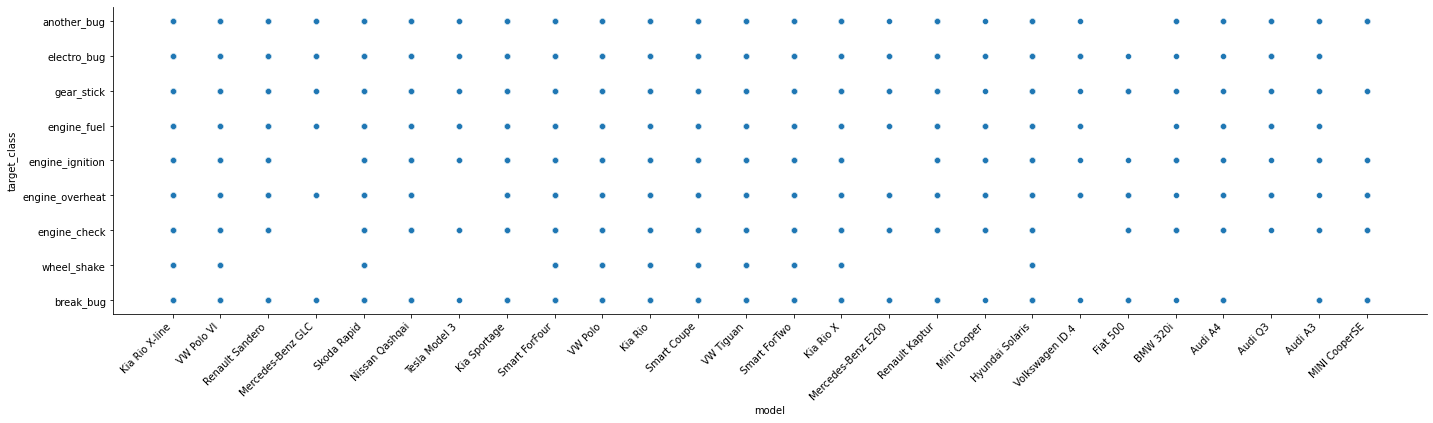

In [24]:
g = sns.relplot(
    data=df,
    x="model",    
    y="target_class",
    
    # hue="target_class",
    kind="scatter",
    aspect=4,
    # alpha=0.5,
);

g.set_xticklabels(rotation=45, horizontalalignment="right", step=1);

У электрокара "MINI CooperSE" отсутствуют поломки типа "electro_bug" - верно

Вид поломки "wheel_shake" меньше остальных представлен среди моделей машин - верно

Поломка класса "engine_check" самая популярная среди всех - неверно



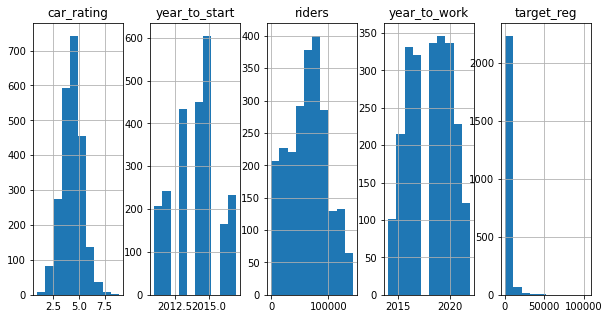

In [34]:
df.hist(figsize=(10, 5), layout=(-1, 5));

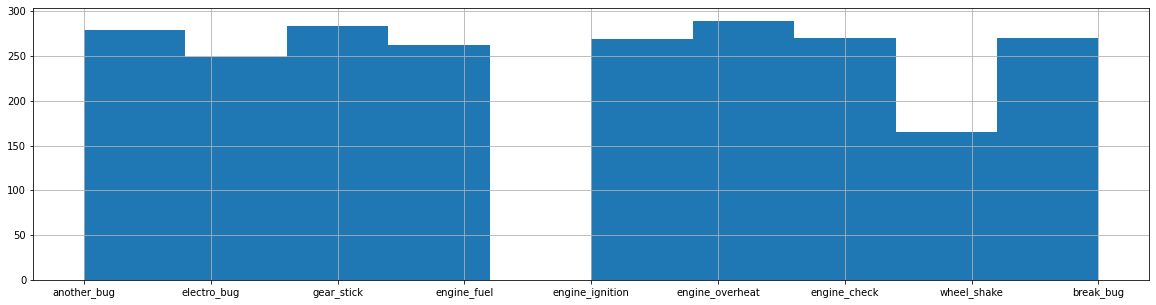

In [37]:
df.target_class.hist(figsize=(20, 5), )

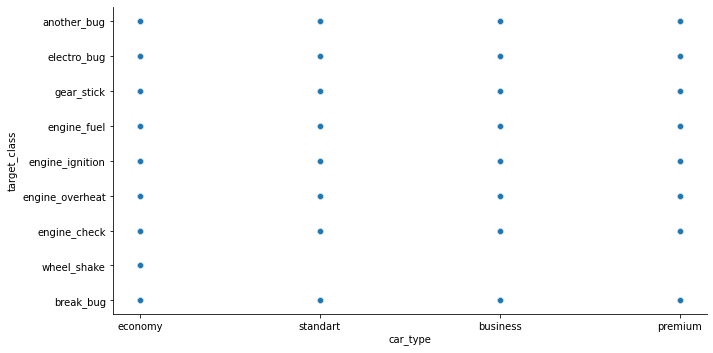

In [17]:
g = sns.relplot(
    data=df,
    x="car_type",
    
    y="target_class",
    
    # hue="target_class",
    kind="scatter",
    aspect=2,
    # alpha=0.5,
);

Поломка "wheel_shake" в основном случалась в сегменте машин типа "standart" - неверно, т.к. там вообще нет этого типа поломок

Модель машины "Nissan Qashqai" имеет максимальное число поломок класса "engine_ignition"



In [41]:
df_tmp = df.loc[df.model == 'Nissan Qashqai']
df_tmp

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,3528.55,engine_overheat
22,Z-1155909A,Nissan Qashqai,standart,petrol,4.62,2013,40025,2020,4165.56,engine_overheat
28,k-1015732Y,Nissan Qashqai,standart,petrol,5.42,2012,20276,2016,791.31,engine_overheat
44,z34396656x,Nissan Qashqai,standart,petrol,4.12,2011,251,2015,6997.92,engine_ignition
62,w-1247670S,Nissan Qashqai,standart,petrol,5.18,2013,44612,2016,5781.02,engine_overheat
...,...,...,...,...,...,...,...,...,...,...
2254,N-9452332x,Nissan Qashqai,standart,petrol,4.36,2014,64293,2022,1080.52,electro_bug
2269,L96875350x,Nissan Qashqai,standart,petrol,4.12,2014,70427,2015,9020.71,engine_ignition
2285,I69261244y,Nissan Qashqai,standart,petrol,4.18,2015,87802,2021,14459.70,another_bug
2292,u-2156978e,Nissan Qashqai,standart,petrol,4.84,2015,87414,2019,7525.50,engine_ignition


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde3c568fd0>,
      dtype=object)

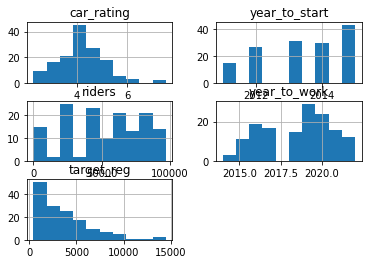

In [43]:
df_tmp.hist()

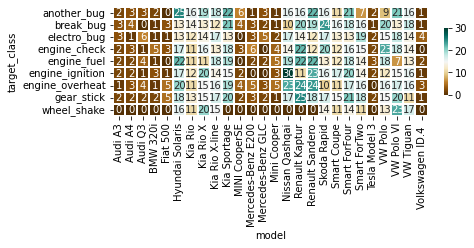

In [45]:
crst = pd.crosstab(
    df["target_class"],
    df["model"],
    # normalize=True,
).round(4)

heatmap = sns.heatmap(
    crst,
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,)

Модель машины "Nissan Qashqai" имеет максимальное число поломок класса "engine_ignition" - верно

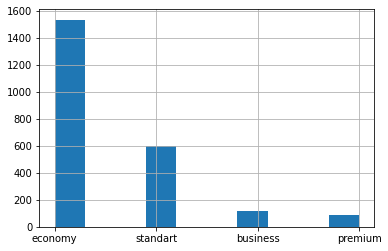

In [38]:
df.car_type.hist()

Второе место по числу поломок приходится на машины типа premium - неверно

# 6

In [48]:
import matplotlib.pyplot as plt

In [46]:
rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")

rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

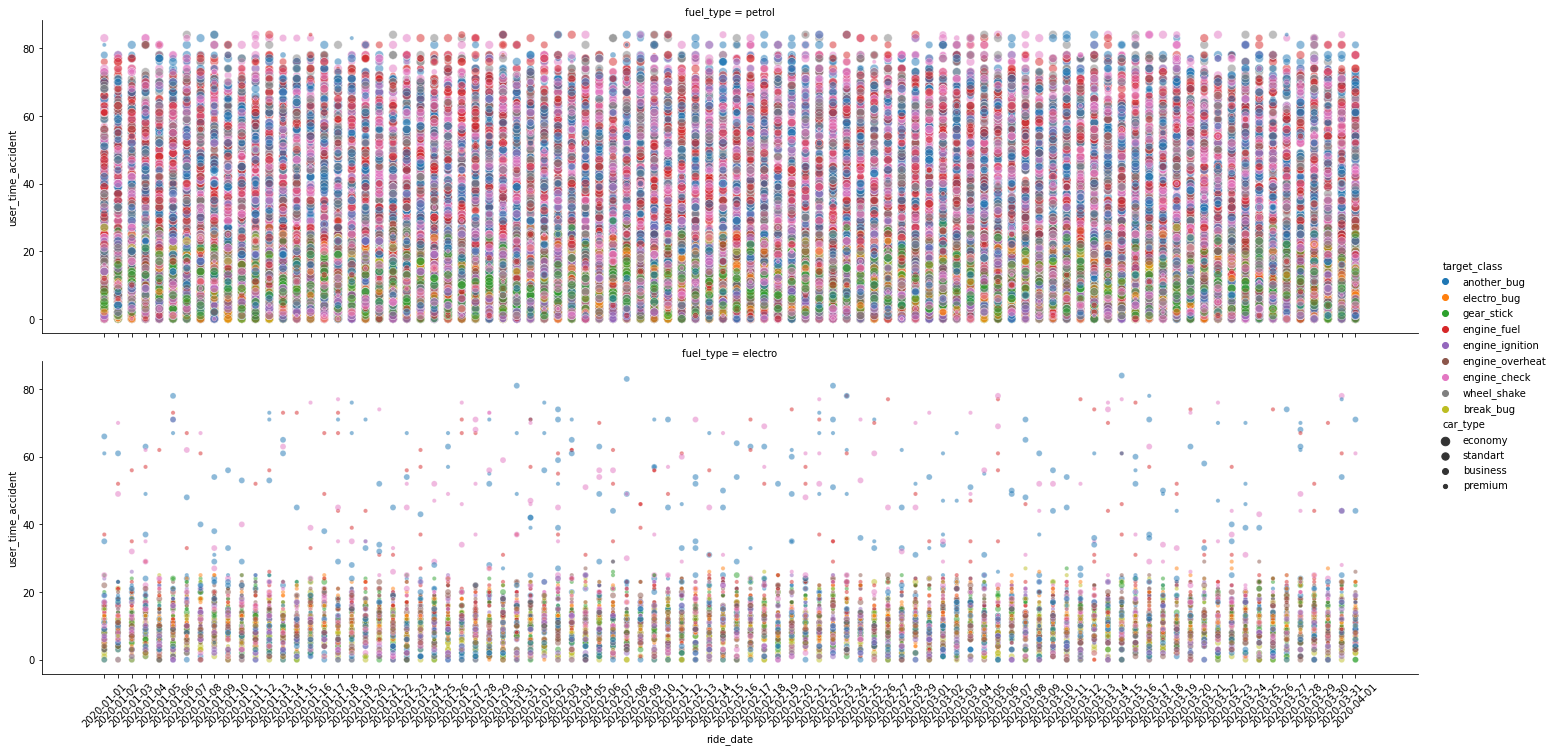

In [53]:
params = {'data' : rides_info,
          'kind' : 'scatter',
          'x' : 'ride_date',
          'y' : 'user_time_accident',
          'row' : 'fuel_type',
          'size' : 'car_type',
          'hue' : 'target_class',
          'aspect' : 4, 
          'alpha' : 0.5}

g = sns.relplot(**params)
plt.xticks(rotation=45);